BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [3]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [4]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = BeautifulSoup(html, 'html.parser')
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling
p3 = p1.next_sibling.next_sibling.next_sibling
print(h1.string)
print(p1.string)
print(p2.string)
print(p3.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것




find() : 
- HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴

find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)


In [5]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = BeautifulSoup(html, 'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string, type(title.string))
print(body.string)
print(title.text, type(title.text))
print(body.text)
print(body.get_text())

스크레이핑이란? <class 'bs4.element.NavigableString'>
웹 페이지를 분석하는 것
스크레이핑이란? <class 'str'>
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [6]:
texts = soup.findAll('p')
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [7]:
#urlopen()과 Beautifulsoup의 조합
from bs4 import BeautifulSoup
import urllib.request as req
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string
print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [19]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣]', " ",wf)
wf

'  (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다          (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다         (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

#### 과제0722_2
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.

In [21]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣(),.~]', " ",wf)
wf = re.sub('\s+', " ", wf)
wf

' (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다. (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. 아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.


In [11]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]',' ', t)
    print(t, '\n')

   강수  27일 수 은 수도권과 강원영서에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 22 25도  낮 기온은 29 34도로 어제 21일  아침최저기온 20 24도  낮최고기온 23 32도 보다 높겠습니다               이번 예보기간 북태평양고기압의 발달 여부와 정체전선의 위치에 따라 강수 구역이 변동될 수 있으며  정체전선의 영향권에서 벗어난 지역에도 대기 불안정으로 소나기가 내릴 가능성이 있겠으니  앞으로 발표되는 기상정보를 참고하기 바랍니다  

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많고 비 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

흐림 

흐림 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많고 비 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

흐림 

흐림 

구름많음 

구름많음 

흐림 

흐림 

구름많

In [25]:
req = requests.get('https://naver.com')
html = req.text

soup = BeautifulSoup(html, 'html.parser')
# result = soup.find_all('a', 'api_link')
# result = soup.find_all('span', class_='blind')[0]
result = soup.find_all('span', attrs={'class':'fix'})
result



[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [29]:
import re

req = requests.get('https://naver.com')
soup = BeautifulSoup(html, 'html.parser')
print(soup.find_all(string = '네이버'))
print(soup.find_all(string = re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', "본 포스팅은 '디올 뷰티'로부터 제품과 소정의 원고료를 제공 받은 후, 솔직하게 작성된 제품 후기입니다. 안녕하세요 네이버 인플루언서 나날뷰티 입니다 :) 지난번 #디올포에버파운데이션 을 보여드린 후 바로 #인생파데 로 등극해 ㅎㅎ 꾸준히 잘 쓰고 있는데요~(짱좋) 요즘 날씨가 정말 덥고 습해서 ㅠ 더욱 더 지속력 좋은 메이크업을 다들 원하시니.. #디올파", '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시


In [29]:
import urllib.request as req
url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
price = soup.select_one('#exchangeList > li.on > a.head.usd > div > span.value').string
print('usd/krw=', price)

usd/krw= 1,309.00


In [30]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""


In [31]:
!pip install lxml

In [34]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html_doc, 'html.parser') #lxml
print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [36]:
bs.title

<title>The Dormouse's story</title>

In [37]:
bs.title.name

'title'

In [38]:
bs.title.parent.name

'head'

In [39]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [42]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [46]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [50]:
bs.a['class']

['sister']

In [51]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [53]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

#### string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [62]:
bs = BeautifulSoup(html_doc, 'html.parser')

In [63]:
print(bs.string)

None


In [64]:
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [66]:
print(bs.find('div').string)

None


In [67]:
print(bs.find('div').get_text())

In [69]:
print(bs.find('body').string)

None


In [72]:
print(bs.find('body').get_text())



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [73]:
bs.a.string

'Elsie'

In [76]:
li = bs.find_all('p')
for i in li:
    print(i.string)

The Dormouse's story
None
...


In [77]:
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


#### urllib + bs

In [6]:
import urllib.request as rq
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [7]:
print(bs.find('div').find('a').string)

메인 메뉴로 바로가기


In [8]:
items = bs.find('div').find_all('a')
for item in items:
    print(item.get_text())


메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스



'사적채용 논란' 대통령실 9급 직원 부친, 강릉선관위원직 사의
'사적채용 논란' 대통령실 행정요원의 부친 강릉시선관위원직 사의
채용 논란 우 모 행정요원 부친, 선관위원 사의 표명
`사적채용 논란` 대통령실 9급 직원 부친, 강릉선관위원직 사의
20개의 관련뉴스 더보기



尹 "경찰집단 반발은 중대한 국가 기강 문란 될 수 있다"(상보)
尹대통령 "치안 관서장 집단행동 깊은 우려…중대 국가기강문란"
[속보]尹대통령, '경찰의 난'에 "집단 반발, 중대한 국가 기강문란"
[속보] 尹대통령 “서장들 집단 행동 깊은 우려... 중대 기강 문란”
9개의 관련뉴스 더보기


동영상기사

한동훈·이상민 공세 퍼부은 민주당, 강제북송 역공한 국힘
[영상] 박범계-한동훈 국회서 설전…"왕중의 왕 vs 얘기 안돼"
박범계 "법무부장관 1인 지배 시대" VS 한동훈 "인사 검증만 보조"…전·현직 법무부장관 맞불
맞붙은 박범계·한동훈…“인사권 맘대로” vs “본인도 패싱하지 않았냐”
92개의 관련뉴스 더보기



‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계
설훈, '이재명 셀프 공천' 논란에 "누가 봐도 이상하다"
非明 “이재명, 계양을 셀프공천 해명해야”… 李, 대응 피한채 尹때리기
'사법리스크'에 '셀프 공천' 논란까지, 악재 겹친 이재명
18개의 관련뉴스 더보기



한덕수 총리 "경찰서장 회의, 상사명령 불복‥있을 수 없는 일"



한 총리 "경찰서장 회의, 상사 명령 불복한 것…있을 수 없는 일"
11개의 관련뉴스 더보기



한동훈, 김건희 '무혐의'·김혜경 '압수수색' 어떻게 방

In [9]:
items = bs.find('div').find_all('a')
for item in items:
    wt = re.sub(r'\n*', '', item.get_text())
    print(wt)

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스

'사적채용 논란' 대통령실 9급 직원 부친, 강릉선관위원직 사의
'사적채용 논란' 대통령실 행정요원의 부친 강릉시선관위원직 사의
채용 논란 우 모 행정요원 부친, 선관위원 사의 표명
`사적채용 논란` 대통령실 9급 직원 부친, 강릉선관위원직 사의
20개의 관련뉴스 더보기

尹 "경찰집단 반발은 중대한 국가 기강 문란 될 수 있다"(상보)
尹대통령 "치안 관서장 집단행동 깊은 우려…중대 국가기강문란"
[속보]尹대통령, '경찰의 난'에 "집단 반발, 중대한 국가 기강문란"
[속보] 尹대통령 “서장들 집단 행동 깊은 우려... 중대 기강 문란”
9개의 관련뉴스 더보기
동영상기사
한동훈·이상민 공세 퍼부은 민주당, 강제북송 역공한 국힘
[영상] 박범계-한동훈 국회서 설전…"왕중의 왕 vs 얘기 안돼"
박범계 "법무부장관 1인 지배 시대" VS 한동훈 "인사 검증만 보조"…전·현직 법무부장관 맞불
맞붙은 박범계·한동훈…“인사권 맘대로” vs “본인도 패싱하지 않았냐”
92개의 관련뉴스 더보기

‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계
설훈, '이재명 셀프 공천' 논란에 "누가 봐도 이상하다"
非明 “이재명, 계양을 셀프공천 해명해야”… 李, 대응 피한채 尹때리기
'사법리스크'에 '셀프 공천' 논란까지, 악재 겹친 이재명
18개의 관련뉴스 더보기

한덕수 총리 "경찰서장 회의, 상사명령 불복‥있을 수 없는 일"

한 총리 "경찰서장 회의, 상사 명령 불복한 것…있을 수 없는 일"
11개의 관련뉴스 더보기

한동훈, 김건희 '무혐의'·김혜경 '압수수색' 어떻게 방어했나

"도이치 수사는?"

In [10]:
# re.sub('[\n+]', '', items)

In [27]:
itemes = bs.find('div').find_all('a')
li = []
for item in itemes:
    li.append(item.get_text())
a = (' ').join(li)
wt1 = re.sub('[^\w+()''.]', ' ', a)
wt2 = re.sub('\s+', ' ', wt1)
print(wt2)

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 사적채용 논란 대통령실 9급 직원 부친 강릉선관위원직 사의 사적채용 논란 대통령실 행정요원의 부친 강릉시선관위원직 사의 채용 논란 우 모 행정요원 부친 선관위원 사의 표명 사적채용 논란 대통령실 9급 직원 부친 강릉선관위원직 사의 20개의 관련뉴스 더보기 尹 경찰집단 반발은 중대한 국가 기강 문란 될 수 있다 (상보) 尹대통령 치안 관서장 집단행동 깊은 우려 중대 국가기강문란 속보 尹대통령 경찰의 난 에 집단 반발 중대한 국가 기강문란 속보 尹대통령 서장들 집단 행동 깊은 우려... 중대 기강 문란 9개의 관련뉴스 더보기 동영상기사 한동훈 이상민 공세 퍼부은 민주당 강제북송 역공한 국힘 영상 박범계 한동훈 국회서 설전 왕중의 왕 vs 얘기 안돼 박범계 법무부장관 1인 지배 시대 VS 한동훈 인사 검증만 보조 전 현직 법무부장관 맞불 맞붙은 박범계 한동훈 인사권 맘대로 vs 본인도 패싱하지 않았냐 92개의 관련뉴스 더보기 민생 메시지 올인하는 이재명 이재명 때리기 올인하는 비명계 설훈 이재명 셀프 공천 논란에 누가 봐도 이상하다 非明 이재명 계양을 셀프공천 해명해야 李 대응 피한채 尹때리기 사법리스크 에 셀프 공천 논란까지 악재 겹친 이재명 18개의 관련뉴스 더보기 한덕수 총리 경찰서장 회의 상사명령 불복 있을 수 없는 일 한 총리 경찰서장 회의 상사 명령 불복한 것 있을 수 없는 일 11개의 관련뉴스 더보기 한동훈 김건희 무혐의 김혜경 압수수색 어떻게 방어했나 도이치 수사는 金여사 겨눈 박범계 한동훈 전 정권부터 1년여 수사 곧 결론 날 것 8개의 관련뉴스 더보기 장진호전투 영웅 옴스테드 美예비역 중장 별세 尹 대통령 장진호 영웅 조전 

#### 과제0725-1
상기 출력물을 불필요한 공백 없이 정렬하여 출력하세요.

In [110]:
items = bs.find('div', id='header').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [260]:
texts = bs.find_all('p')
for t in texts:
#     print(t.string)
    print(t.get_text())
    

AiRS추천으로 구성된 뉴스를 제공합니다.
오전 11시~오후 12시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [302]:
import urllib.request as rq
import re

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs1 = bs.get_text()

p = re.sub('[^가-힣]',' ', bs1)
p1 = re.sub('\s+',' ', p)
print(p1)



 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 아시아경제 월 일 구독 피겨여왕 김연아 성악가 고우림과 월 결혼 피겨여왕 김연아 가 오는 월 결혼한다 김연아의 소속사 올댓스포츠는 일 김연아가 오는 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 고 밝혔다 김연아의 피앙세인 고우림은 서울대 주간경향 월 일 구독 경계에 선 청춘의 험난한 취업 여정 한국사회에서 함께 살아가고 있지만 차별과 배제를 일상적으로 겪는 이주민 세대가 있다 본인 또는 부모가 외국으로부터 이주한 경험이 있는 이주배경 청년 이다 여기서 이주 란 중국 베트남 몽골 러시아 등 외 코리아중앙데일리 월 일 구독 주간조선 월 일 구독 김연아 연하 성악가 고우림과 결혼 년 열애 어떻게 숨겼나 한국 스포츠계의 슈퍼스타 김연아가 오는 월 살 연하 성악가와 결혼한다 김연아의 매니지먼트사인 올댓스포츠는 일 보도자료를 통해 김연아가 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 채널 월 일 구독 박범계 한동훈에 법치농단 따져 묻겠다 윤석열 정부의 첫 대정부질문 질의자로 나서는 박범계 더불어민주당 의원이 한동훈 법무부장관에게 법치농단 하는 이유를 따져 묻겠다고 밝혔습니다 박 의원은 오늘 일 라디오 김현정의 뉴스쇼 에서 현재 법 새로보기 시사저널 월 일 구독 오르는 금리 떨어지는 집값 영끌족 상환 부담에 비상 영끌족 대출금리 월부터 원리금 만원 부담 전체 가계대출 중 세대 비중 대보다 높아 대출금리가 포인트나 올랐습니다 대 남성 씨는 년 경기 전주 월 일 구독 전북교육청 지방공무원 임용 필기시험 합격자 발표 전라북도교육청이 지방공무원 필기시험 합격자를 발표했습니다 전북교육청은 교육행정 직군에서 명 전산과 사서 공업 등 나머지 개 분야에서 명 등 총 명의 필기시험 합격자를 결정했으며 이들을 대상으 아

In [288]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
text = bs.get_text()

p = '[가-힣]+'

regrex = re.compile(p)
result = regrex.findall(text)
result


['네이버',
 '뉴스',
 '본문',
 '바로가기',
 '뉴스',
 '연예',
 '스포츠',
 '날씨',
 '프리미엄',
 '검색',
 '언론사별',
 '정치',
 '경제',
 '사회',
 '생활',
 '문화',
 '과학',
 '세계',
 '랭킹',
 '신문보기',
 '오피니언',
 '팩트체크',
 '전체',
 '언론사',
 '뉴스스탠드',
 '라이브러리',
 '콘텐츠',
 '월',
 '전체',
 '언론사',
 '뉴스스탠드',
 '라이브러리',
 '언론사편집',
 '기자',
 '연재',
 '구독설정',
 '일다',
 '월',
 '일',
 '구독',
 '몇',
 '년씩',
 '감금',
 '아이와',
 '격리',
 '이렇게까지',
 '해야',
 '하나',
 '일본',
 '출입국관리소에',
 '수용된',
 '외국인',
 '여성들을',
 '만나온',
 '오다',
 '아사히',
 '씨는',
 '출입국관리',
 '체계와',
 '수용시설의',
 '문제점을',
 '지적하는',
 '활동을',
 '하고',
 '있다',
 '출입국관리',
 '시스템에',
 '의해',
 '수용된',
 '여성들의',
 '실태를',
 '오다',
 '씨가',
 '직접',
 '전한다',
 '데일리안',
 '월',
 '일',
 '구독',
 '우영우',
 '감동',
 '속',
 '그',
 '팽나무',
 '실제',
 '장소',
 '창원서',
 '인기',
 '인증샷',
 '이어져',
 '경남',
 '창원에',
 '있는',
 '거대한',
 '팽나무가',
 '최근',
 '인증샷',
 '명소로',
 '인기몰이',
 '중이다',
 '최근',
 '화제인',
 '드라마',
 '이상한',
 '변호사',
 '우영우',
 '에',
 '등장한',
 '이후로',
 '입소문을',
 '타서다',
 '지난',
 '일',
 '방송된',
 '이상한',
 '변호사',
 '우영우',
 '회에는',
 '팽나',
 '미디어오늘',
 '월',
 '일',
 '구독',
 '국민의힘',
 '수신료',
 '폐지주장에',
 '비전문가적',
 '주장',
 '

In [303]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
text = str(bs)

result = re.findall('[가-힣]+', text)
result = ' '.join(result)
result

'네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 코리아중앙데일리 월 일 코리아중앙데일리 구독 주간경향 월 일 주간경향 구독 경계에 선 청춘의 험난한 취업 여정 한국사회에서 함께 살아가고 있지만 차별과 배제를 일상적으로 겪는 이주민 세대가 있다 본인 또는 부모가 외국으로부터 이주한 경험이 있는 이주배경 청년 이다 여기서 이주 란 중국 베트남 몽골 러시아 등 외 지디넷코리아 월 일 지디넷코리아 구독 일론 머스크 구글 창업자 세르게이 브린 아내와 불륜 일론 머스크 테슬라 최고경영자 가 친한 친구이던 세르게이 브린 구글 공동창업자의 아내와 불륜을 저질렀다고 월스트리트저널 이 일 현지시간 보도했다 보도에 따르면 세르게이 브린은 지난 월 아내 니 국민일보 월 일 국민일보 구독 피겨여왕 김연아 살 연하 고우림과 월 결혼 피겨여왕 김연아 가 오는 월 결혼한다 김연아의 매니지먼트사인 올댓스포츠는 일 김연아가 오는 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 고 발표했다 결혼식 장소는 신라호텔인 것으 국제신문 월 일 국제신문 구독 행안부 경찰 총경 회의 대단히 부적절 평검사 회의와 달라 행정안전부가 경찰 총경 회의에 대해 대단히 부적절하고 적법한 직무명령에 불복종한 사안 이라며 경찰청에서 위법성에 대해 엄정하게 조사하고 후속처리할 것으로 생각한다 는 입장을 밝혔다 이상민 행안부 장관은 일 새로보기 월 일 구독 동영상 재생시간 이상한 변호사 우영우 팽나무 천연기념물 지정 조사 문화재청은 인기리에 방송 중인 이상한 변호사 우영우 에 등장한 팽나무의 문화재적 가치를

In [310]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
texts = bs.find_all('p')
for t in texts:
#     print(t.string, '\n')
    print(t.get_text(), '\n')

6년 전 전석 매진작 배우·제작진 귀환 전무송·박정자·손숙 등 대배우들 조연 3040 젊은 배우들이 주연 맡아 현대적 외피 두른 정통극...배우들 열연 빛나 '여성혐오' 지적 받는 원작 속 가부장 사회 수동적인 여성 

근육을 유지하고 강화하는데 좋은 음식으로 닭가슴살이 꼽힌다. 하지만 퍽퍽한 맛이 단점이다. 건강을 위해 식단에 올려도 남기는 경우가 적지 않다. 공장에서 만든 단백질 보충제 형태보다는 자연 그대로의 음식이 좋은데 어 

#. 지난 4월 철거공사를 끝낸 서울 용산의 한 다세대주택(빌라). 건물 4개를 허문 자리에 각종 폐기물이 방치된 채로 공사장 인부들은 물론 포클레인 등 공사 장비가 3개월째 자취를 감춰버렸다. 건축비 상승으로 공사 

나홀로 세계여행 인도양의 보석, 몰디브비행기에서 몰디브의 산호초 섬들을 보는 순간, 숨이 멎었다. 사진으로 보던 모습과는 비교도 되지 않았다. 바다에는 비취빛 에메랄드들이 반짝이고 있었다. 비행기가 멈추었으면 하는  

중국 텐센트가 한국 게임산업협회 이사사로 가입한 것을 두고 게임업계가 시끄럽다. 중국 게임 회사가 한국에서 자유롭게 활동하는 데 반해, 중국에서는 한국 게임사의 활약이 제약을 받는 것을 두고 설왕설래가 오간다. 무역 

'피겨퀸' 김연아(32)와 성악가 고우림(27)이 오는 10월 결혼식을 올린다. 25일 김연아의 매니지먼트사인 올댓스포츠는 "김연아가 10월 서울 모처에서 성악가 고우림과 화촉을 밝힌다"고 밝혔다. 올댓스포츠는 "김 

지난해 코로나19로 인한 급락장 이후 대세 상승장의 기류에 올라탄 동학개미들의 활동력이 현저하게 떨어졌다. 잠재적 투자 자금인 예탁금은 올해 들어 부쩍 감소하고 있고 거래대금도 예년 수준에 미치지 못하는 상황에 마주 

신종 코로나바이러스 감염증(코로나19) 확산에 대응해 각국의 봉쇄조치가 가장 활발하게 이뤄졌던 2020년 4월 세계적으로 교통량은 41% 가량 감소했다. 해양교통량과 항공교통량은 각각 9%, 75% 정도 줄어들었다. 

전 피겨스케이팅 국가대표 선수

#### requests + bs

In [317]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p').get_text()
text


'중국 텐센트가 한국 게임산업협회 이사사로 가입한 것을 두고 게임업계가 시끄럽다. 중국 게임 회사가 한국에서 자유롭게 활동하는 데 반해, 중국에서는 한국 게임사의 활약이 제약을 받는 것을 두고 설왕설래가 오간다. 무역'

#### 과제 0725_2
기상청 육상 정보에서 강원도의 지역번호는 105번, 강원도의 날씨예보를 불필요한 공백을 제거한 후, 출력하세요.

In [28]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as rq

url = "https://testweather.kma.go.kr/w/weather/forecast/mid-term.do?stnId1=105"
r = rq.get(url)
html = r.text
# bs = BeautifulSoup(html, 'lxml')
# bss = bs.get_text()
# br = re.findall
br = re.findall('<li>○(.+)?</li>',html)
m = re.sub('[^\w+\d+(),.~]',' ',str(br))
m1 = re.sub('br',' ',m)
m2 = re.sub('\s+',' ',m1)
m2



' (하늘상태) 이번 예보기간에는 흐린 날이 많겠습니다. (기온) 이번 예보기간 아침 기온은 19~26도, 낮 기온은 26~33도로 어제(25일, 아침최저기온 19~23도, 낮최고기온 25~34도)와 비슷하겠습니다. (해상) 동해중부해상의 물결은 0.5~2.0m로 일겠습니다. (주말전망) 30일(토)~31일(일)은 가끔 구름많겠습니다. 아침 기온은 19~25도, 낮 기온은 27~33도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다. '

In [ ]:
# import pandas as pd
# from bs4 import BeautifulSoup
# import requests as rq

# url = "https://testweather.kma.go.kr/w/weather/forecast/mid-term.do?stnId1=105"
# r = rq.get(url)
# html = r.text
# bs = BeautifulSoup(html, 'lxml')
# bss = bs.select()

In [598]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as rq

url = "https://www.weather.go.kr/w/weather/forecast/short-term.do?stnId=105"
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
br = bs.select('span[class=depth_1], span[class=depth_2]')

for t in br:
    wt = re.sub(r'\n+', '', t.get_text())
    print(wt)
    


□  (종합) 무더위 유의, 모레까지 강원내륙.산지 소나기 곳, 돌풍과 천둥.번개 유의
○  (오늘) 가끔 구름많고, 강원남부산지 저녁(18~21시) 한때 소나기 곳
○  (내일) 가끔 구름많고, 오후(12~15시)부터 저녁(18~21시) 사이 강원영서 소나기 곳
○  (모레) 강원내륙과 산지 대체로 흐리다가 오후부터 가끔 구름많겠음, 강원동해안 대체로 맑음, 강원영서 오후(12~15시)부터 저녁(18~21시) 사이 소나기 곳
○  (글피) 강원영서 구름많음, 강원영동 대체로 흐림
□  소나기에 의한 예상 강수량
○  (25일)강원남부산지: 5~20mm
○  (26일)강원영서: 5~40mm


#### 과제0725_3. 
"http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [477]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
texts = bs.find_all('span')
li = []
for t in texts:
    li.append(t.text)

p = re.sub('[^가-힣]',' ', str(li))

p1 = re.sub('\s+',' ', p)
print(p1)


 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 바로가기 바로가기 추가 추가 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 티빙 티빙 네이버 영화 네이버 영화 티빙 티빙 웨이브 웨이브 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 일 전 이상한 변호사 우영우 이상한 변호사 우영우 재생 재생시간 재생시간 시간 전 돌싱글즈 돌싱글즈 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 시간 전 디즈니 코리아 디즈니 코리아 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 시간 전 조선 정신과 의사 유세풍 조선 정신과 의사 유세풍 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 오후 시 업데이트 위 상승 현아 나빌레라 재생 가사 위 상승 있지 재생 가사 위 케이시 환혼 재생 가사 위 하락 초봄 에이핑크 초봄 재생 가사 위 상승 카더가든 환혼 재생 가사 위 상승 하은 포맨 입술 끝에 두고 온 말 재생 가사 위 상승 구원찬 유미의 세포들 시즌 재생 가사 위 하락 학번 스티커 사진 재생 가사 위 하락 재생 가사 위 상승 거미 환혼 재생 가사 재생 재생시간 재생시간 시간 전 돌싱글즈 돌싱글즈 재생

#### 과제0725_4. 
"http://www.naver.com" 사이트에서 span 태그에 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 출력하세요.


In [30]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
texts = bs.find_all('span')
li = []
for t in texts:
    li.append(t.text)
a = (' ').join(li)

p = re.sub('[^\w+\d+]',' ', a)
p1 = re.sub('\s+',' ', p)
print(p1)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt currency currency 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query intend intend 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 24 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음 김해나 김해나 닥터바이오 더마 코스메틱 닥터바이오 더마 코스메틱 5일 전 뷰스타 민슨 뷰스타 민슨 1개월 전 계피 계피 1주일 전 주플리 주플리 1주일 전 슈비둡 슈비둡 재생 재생시간14 03 재생시간 1개월 전 디렉터파이 디렉터파이 재생 재생시간13 23 재생시간 3개월 전 디렉터파이 디렉터파이 재생 재생시간19 51 재생시간 4개월 전 디렉터파이 디렉터파이 1주일 전 횬블리 횬블리 2개월 전 민됴 민됴 1주일 전 메이쥬니 메이쥬니 2주일 전 르미 르미 재생 재생시간14 43 재생시간 6개월 전 디렉터파이 디렉터파이 재생 재생시간00 29 재생시간 5개월 전 갓신상 갓신상 재생 재생시간21 06 재생시간 5개월 전 디렉터파이 디렉터파이 3주일 전 쥬니 쥬니 1주일 전 비비쥬

#### 과제0725-5 
"http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.


In [44]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

# texts = bs.select('a[id]')

texts = bs.find_all('a', id=True)
print(texts)
li = []
for t in texts:
    li.append(t.text)
a = (' ').join(li)

p = re.sub('[^\w+\d+]',' ', a)
p1 = re.sub('\s+',' ', p)
print(p1)

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="btn_keyboard" href="#" id="ke_kbd_btn" onclick="return false;" role="button"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>, <a aria-pressed="false" class="btn_arw _btn_arw fold" data-atcmp-element="" href="#" id="nautocomplete" role="button" tabindex="2"><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>, <a class="btn_set" data-clk="tca.like" href="#" id="NM_THEME_EDIT_SET" role="button">관심주제 설정</a>, <a class="content_top" href="#wrap" id="NM_scroll_top_btn"><span class="blind">TOP</span></a>]
다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP


#### 과제0725_6
url = 'https://news.naver.com/' 사이트 p태크에서 class가 cjs_ht인 데이터를 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [47]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

texts = bs.select('p[class = cjs_ht]')

p = re.sub('[^가-힣+.]',' ', str(texts))
p1 = re.sub('\s+',' ', p)
print(p1)

 오늘 언론사가 발행한 종이신문에 실린 뉴스 면 기사가 제공됩니다. 


In [52]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://naver.com'
html = rq.urlopen(url)
bs=BeautifulSoup(html, 'lxml')

# print(bs.find('p'))
print(bs.find_all('p', limit=1), '\n')
print(bs.find_all('p', limit=2), '\n')
print(bs.find_all('p', limit=3))

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>]


In [63]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.find('h2', id='mainContent').text
title

'정치'

In [55]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text
title

'정치'

In [125]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.find('img', alt="외계+인 1부")
title

<img alt="외계+인 1부" height="91" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/06/dft_img64x91.png'" src="https://movie-phinf.pstatic.net/20220708_75/16572722362230AyHS_JPEG/movie_image.jpg?type=f64_91" width="64"/>

In [126]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select('#boxofficeTooltip1 > div > div.tooltip > p')
title

[]

In [117]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=192151#'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select_one('#content > div.article > div.mv_info_area > div.mv_info > h3 > a:nth-child(1)').text
title

'외계+인 1부'

##### 과제0726_1
네이버 영화 랭킹 가져와서 조회순 전체 영화 제목을 50개를 출력하세요.(출력방식 1위 : 외계+인 1부)

In [133]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""
import re

bs = BeautifulSoup(html, 'html.parser')
li = bs.find_all(href=re.compile('^https://'))
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


### CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용


In [140]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')
body = '\n'.join([line.text for line in lines])
print(body)

'경찰국 신설' 행안부 직제 개정안 국무회의 통과
2주째 잠행한 김정은..'전승절' 맞아 공식 석상 등장에 주목
尹의 업무보고 방식에 박지원 "세상에 그런 천재가 없어요" 힐난
전주혜 "초선들, 당 지지율 급락에 침묵? 신중함 필요"
정청래 "이재명 사법 리스크? 저쪽 프레임에 우리가 내부총질"
경찰국 신설 시행령 국무회의 의결..내달 2일 시행
'지속 가능한 돌봄사회 제주' 주제 공동포럼 내달 2일 개최
완연한 감소세에도 여전한 '최대비상방역'..'변수'에 긴장하는 북한
대통령실 앞에 선 野.."모든 권한 집중해 경찰장악 저지"
이용호, 靑 개방공간 활용 위한 '총리 산하 TF' 구성 제안


In [144]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
lines = bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
lines.text

"2주 넘게 '두문불출' 김 여사..목요일 등장할까?"

In [162]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
lines = bs.select_one('#harmonyContainer > section').text
line = re.sub('\n+', ' ', lines)
line = re.sub('\s+', ' ', line)
print(line)

 ■ "마드리드 이후 김건희 여사가 안 보인다" 윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다. 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다. ■ 공개행보 재개는? 목요일 진수식이 유력 그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다. 배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 김건희 여사가 진수식에 등장할지는 목요일 확인할 수 있을 

In [159]:
url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url).text
bs = BeautifulSoup(r,'lxml')
lines2 = bs.select('#harmonyContainer > section')
body = ''.join(i.text for i in lines2)
print(re.sub('\n+','\n',body))


■ "마드리드 이후 김건희 여사가 안 보인다"
윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 
북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.
 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 
장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다.
■ 공개행보 재개는? 목요일 진수식이 유력
그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다.
배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 
김건희 여사가 진수식에 등장할지는 목요일 확인할 수

#### 크롤링) 접속 차단되었을때 User-Agent지정(header)
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375

In [174]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101'
req = requests.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')
target = bs.select_one('#main_content')
print(target)
print(target['class'])
print(target['href'])

<div class="content" id="main_content">
<div class="list_body section_index">
<div class="cluster">
<div class="cluster_title">
<span class="cluster_title_inner"><a class="cluster_title_icon_link _news_cluster_layer_btn" href="#biF7L"><i class="cluster_title_icon">안내</i>헤드라인 뉴스</a></span>
<div class="cluster_title_layer _news_cluster_layer is_hidden">
<div class="cluster_title_layer_text">
                            헤드라인 뉴스와 각 기사묶음 타이틀은 <br/> 기사 내용을 기반으로 <strong>자동 추출</strong>됩니다.
                        </div>
<div class="cluster_title_layer_image"></div>
<button class="cluster_title_layer_close _news_cluster_layer_close_btn" type="button">닫기</button>
</div>
</div>
</div>
<div class="_persist">
<div class="cluster">
<div class="cluster_group _cluster_content">
<div class="cluster_head">
<div class="cluster_head_inner">
<a class="cluster_head_more nclicks(cls_eco.clstitle)" href="/main/clusterArticles.naver?id=c_202207261010_00000013&amp;mode=LSD&amp;mid=shm&amp;sid1=101&amp;oid=011&a

KeyError: 'href'

In [178]:
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
for el in target:
    print(el.text)
    print(el['href'])

SK이노베이션, 백혈병·소아암 환자 등에 5억5000만원 지원
https://n.news.naver.com/mnews/article/011/0004080274?sid=101
SK이노 기본급 1% 기부, 백혈병·소아암·장애인 6억 지원
https://n.news.naver.com/mnews/article/008/0004775240?sid=101
SK이노, 소아암·장애인 의수족 지원에 5.5억원 기금 전달
https://n.news.naver.com/mnews/article/016/0002020473?sid=101
SK이노, 노사 참여 ‘1% 행복나눔기금’ 전달…5년간 262억원 집행
https://n.news.naver.com/mnews/article/018/0005277059?sid=101
세계적인 폭염 뚫은 ‘K아이스크림’… 14년 연속 흑자행진
https://n.news.naver.com/mnews/article/081/0003290043?sid=101
전세계 폭염 속 아이스크림 수출·입 상반기 역대 최고
https://n.news.naver.com/mnews/article/421/0006240218?sid=101
'폭염·K컬처'에 상반기 아이스크림 교역 역대 최대‥수출 14%↑
https://n.news.naver.com/mnews/article/214/0001211495?sid=101
‘아이스크림도 K컬쳐’…상반기 아이스크림 수출입 모두 역대 최대
https://n.news.naver.com/mnews/article/056/0011308979?sid=101
월마트, 실적 전망치 하향…“인플레에 옷·TV 소비 감소”
https://n.news.naver.com/mnews/article/018/0005276901?sid=101
글로벌 소비심리 빠르게 위축…월마트 실적 전망 하향
https://n.news.naver.com/mnews/article/005/0001542276?sid=101
'인플레에 지갑 닫힌다' 월마트, 실적전망치 대폭 하향..시간외 주가 

In [193]:
import requests as rq
url = 'https://n.news.naver.com/mnews/article/277/0005122998?sid=101'
req = requests.get(url, headers=headers).text
bs = BeautifulSoup(req, 'html.parser')
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target['data-src'])
# for el in target:
#     print(el)


<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/277/2022/07/25/0005122998_001_20220725155101349.jpg?type=w647" id="img1">
</img>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/277/2022/07/25/0005122998_001_20220725155101349.jpg?type=w647


Q. url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.
- 용도는 주요 키워드 분석을 위한 데이터 셋 만들기


In [218]:
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
req = requests.get(url, headers=headers).text
bs = BeautifulSoup(req, 'html.parser')
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
li=[]
for el in target:
    li.append(el.text)
wt = re.sub('[^가-힣]',' ',str(li))
wb = re.sub('\n+','',wt)
wb = re.sub('\s+',' ',wb)
print(wb)

 한총리 경찰국 신설안 더 투명하고 민주적인 관장 위한 것 정부 오늘 국무회의서 행안부 경찰국 신설안 심의 의결 경찰국 신설 국무회의 의결 경찰 반발 확산에도 속도전 행안부 경찰국 신설안 국무회의 통과 내달 일 공포 종합 윤석열 맞춤 답안 만들었는데 폐지안이나 마련해라 역풍 맞은 여가부 윤 대통령 김현숙에 여가부 폐지 로드맵 조속히 마련하라 윤 대통령 여가부 폐지 로드맵 조속 마련 지시 폐지 현실화 윤 대통령 여가부 폐지 로드맵 조속히 마련하라 지시 경찰 반발에 연일 맹공 군 항명과 같은 무게로 책임 종합 권성동 경찰위원회에 색깔론 들먹 민변 출신 반미투쟁 전력 경찰국은 민주적 견제 경찰 민주 쌍끌이 비판 권성동 경찰 총을 쥔 공권력 항명 집단행동에 단호 대응해야 박지원 왜 쿠데타냐 경찰들이 총 한 방 쐈나 박지원 경찰 징계 대통령직을 검찰총장직으로 생각하는 듯 박지원 한동훈 이상민 직격 과연 스타장관은 특별한 재능 가졌구나 이상민 장관 작심 비판한 박지원 경찰이 총 한방 쐈느냐 한강 넘었냐 한미정상 추모의벽 준공식서 동시메시지 바이든 참석여부 주목 새에덴교회 참전용사 보은행사 미 현지서 개최 추모의 벽 준공식도 이준석은 장외정치 중 이번엔 울릉도서 당원들과 저녁 식사 이번엔 울릉도 이준석 당원 명이 찾아도 다 간다 임종석 강훈식 지지선언 에게 총리감으로도 추천 임종석 강훈식 지지 선언 에 총리 추천한 적도 발끈한 박범계 한동훈 초 간 노려봤다 정부 첫 대정부질문 경찰국 공방 전 현직 법무장관 설전 신뢰 바닥인데 수신료 강제 징수 안돼 수신료 분리징수안 강력 추진 전기요금에서 분리 유엔사 패싱 아니었다 이종섭 승인 받았다 권영세 유엔사 강제북송 알고 승인한 건 아냐 정부에 강력항의 이상직 낙마 내년 전주을 국회의원 재선거 조기 점화하나 정운천 내년 전주을 재선거 출마 고민 년은 무조건 도전 민주당 사단 점령군처럼 경찰장악 한목소리 의회권력 총동원해 막을 것 민주당 원내대표단 대통령실 앞 규탄 회견 항의 서한 안철수 김경수 사면 공개 반대 국정농단 파괴범 면죄부

In [220]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(wb)
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word)>1):
        noun_list.append(word)
# print(morph)
# print(noun_list)

In [234]:
from collections import Counter
count = Counter(noun_list)
data = dict(count.most_common())
print(data)

{'경찰': 17, '박지원': 6, '폐지': 5, '대통령': 5, '장관': 5, '신설': 4, '정부': 4, '반발': 4, '마련': 4, '여가부': 4, '한동훈': 4, '이상민': 4, '박범계': 4, '총리': 3, '민주': 3, '국무회의': 3, '로드맵': 3, '조속': 3, '집단': 3, '행안부': 2, '의결': 2, '도전': 2, '종합': 2, '지시': 2, '권성동': 2, '비판': 2, '스타': 2, '작심': 2, '추모': 2, '준공': 2, '이준석': 2, '이번': 2, '울릉도': 2, '당원': 2, '임종석': 2, '강훈': 2, '지지': 2, '선언': 2, '추천': 2, '수신료': 2, '강제': 2, '징수': 2, '분리': 2, '강력': 2, '유엔': 2, '승인': 2, '항의': 2, '내년': 2, '재선거': 2, '민주당': 2, '안철수': 2, '김경수': 2, '사면': 2, '국정': 2, '농단': 2, '면죄부': 2, '진중권': 2, '참패': 2, '국가': 2, '기강': 2, '문란': 2, '관장': 1, '오늘': 1, '심의': 1, '확산': 1, '통과': 1, '내달': 1, '공포': 1, '윤석열': 1, '맞춤': 1, '답안': 1, '안이': 1, '역풍': 1, '김현숙': 1, '현실': 1, '연일': 1, '맹공': 1, '명과': 1, '무게': 1, '책임': 1, '위원회': 1, '색깔론': 1, '민변': 1, '출신': 1, '반미투쟁': 1, '전력': 1, '견제': 1, '쌍끌이': 1, '공권력': 1, '행동': 1, '단호': 1, '대응': 1, '쿠데타': 1, '징계': 1, '대통령직': 1, '검찰총장': 1, '생각': 1, '직격': 1, '과연': 1, '재능': 1, '한강': 1, '한미정상': 1, '동시': 1, '메시지': 1, '바이든': 1, '참석': 1, '여부': 

In [ ]:
#### 과제0726_2
# 제품 테이블에서 첫번째 타이틀 행을 제외한 모든 제품 행을 출력하세요.

In [ ]:
# html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)

#### 과제0726_2
네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
(용도는 전체, 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
#웹구조 파악 : sid1 = 100, sid2= 264, page = 
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101  

In [ ]:

https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=265

In [267]:
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)


In [268]:
import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [274]:
bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}
for big in bigcats:
    for cat in bigcats[big]:
        print(cat)

264
265
268
267
259
258
261
262
260
241
237
242
248
245
227
230
283
228


In [362]:
from bs4 import BeautifulSoup
import requests

bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}

    

ind=0 #행번호

for big in bigcats:
    for cat in bigcats[big]:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            news = requests.get(url, headers=headers)
            bs = BeautifulSoup(news.text, 'html.parser')
            links = bs.select('#main_content > div > ul > li > dl > dt > a')
            newslinks = []
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) #중복기사 제거

            for link in newslinks:
                res2 = requests.get(link, headers=headers).text
                bs2 = BeautifulSoup(res2, 'html.parser')
                news = bs2.find('div', id='dic_area').text
                news = re.sub('\n','',news) #계행을 공백으로
                news = re.sub('\t','',news) #tab을 공백으로
                news_df.loc[ind] = [news,cat]
                ind +=1
news_df

        


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [253]:
from bs4 import BeautifulSoup
import requests

cats = [264,265,267,268]
ind = 0 # 행 번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks = []
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) #중복기사 제거
        
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id = 'dic_area').text
            news = re.sub('\n','',news) # 개행을 공백으로
            news = re.sub('\t','',news) # tab을 공백으로
            news_df.loc[ind] = [news,cat]
            ind +=1
            
news_df

,news,category
0,(서울=연합뉴스) 안정원 기자 = 윤석열 대통령이 26일 오전 서울 용산 대...,264
1,(서울=뉴스1) 안은나 기자 = 윤석열 대통령이 26일 용산 대통령실 집무실에서 한...,264
2,"기사내용 요약""사면 방향 기준 사전 언급은 부적절""""사면은 부처 업무보고 대상도 아...",264
3,"기사내용 요약티타임 '검언유착' 비판에 ""그렇게 보이지 않는다""""공직자, 언론으로부...",264
4,"한동훈 법무장관, 첫 대통령 업무보고윤석열 대통령이 26일 한동훈 법무부 장관으로부...",264
...,...,...
1159,(평양 노동신문=뉴스1) = 북한 노동당 기관지 노동신문은 26일 '조국해방전쟁'으...,268
1160,(평양 노동신문=뉴스1) = 북한 노동당 기관지 노동신문은 26일 '조국해방전쟁'으...,268
1161,기사내용 요약대량살상무기 개발 못지 않게 불법 사이버 활동도 우려북한의 온라인 범죄...,268
1162,"25일 정치·외교·안보·통일분야 대정부질문윤상현·하태경·태영호·홍석준, 文정부 압박...",268


In [361]:
from bs4 import BeautifulSoup
import requests

bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}

    

ind=0 #행번호

for big in bigcats:
    for cat in bigcats[big]:
        for i in range(10):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            news = requests.get(url, headers=headers)
            bs = BeautifulSoup(news.text, 'html.parser')
            links = bs.select('#main_content > div > ul > li > dl > dt > a')
            newslinks = []
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) #중복기사 제거

            for link in newslinks:
                res2 = requests.get(link, headers=headers).text
                bs2 = BeautifulSoup(res2, 'html.parser')
                try:
                    news = bs2.find('h2', class_='media_end_head_headline').text
                except:
                    pass
                news = re.sub('\n','',news) #계행을 공백으로
                news = re.sub('\t','',news) #tab을 공백으로
                news_df.loc[ind] = [news,cat]
                ind +=1
news_df

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [360]:
from bs4 import BeautifulSoup
import requests

bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}

    

ind=0 #행번호

for big in bigcats:
    for cat in bigcats[big]:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            news = requests.get(url, headers=headers)
            bs = BeautifulSoup(news.text, 'html.parser')
            links = bs.select('#main_content > div > ul > li > dl > dt > a')
            newslinks = []
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) #중복기사 제거

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [359]:
for big in bigcats:
    for cat in bigcats[big]:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            print(url)

https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=1
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=2
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=3
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=4
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=5
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=6
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=7
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=8
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=9
https://news.naver.com/main/list.naver?mode=LS2D&sid2=264&sid1=100&mid=shm&date=20220726&page=10
https://news.naver.com/main/list.naver?

In [ ]:
import pandas as pd

df = pd.read_json('news_df')

df2 = df.news.to_list()

m = re.sub('[^가-힣]', ' ', str(df2))
m = re.sub('\s+',' ',m)
m

In [354]:
okt = Okt()

stop_words = '억원'
word_token = okt.morphs(str(m))

s = [word for word in word_token if not word in stop_words]
s

['대통령',
 '기업',
 '활동',
 '위축',
 '시키는',
 '과도',
 '한',
 '형벌',
 '규정',
 '개선',
 '지시',
 '국방부',
 '유엔',
 '사',
 '판문점',
 '통과',
 '허용',
 '북송',
 '승인',
 '의미',
 '는',
 '아냐',
 '포토',
 '육군',
 '대규모',
 '항공',
 '작전',
 '훈련',
 '유럽',
 '에',
 '이어',
 '아세안',
 '과도',
 '정상',
 '간',
 '비즈니스',
 '외교',
 '시작',
 '국내',
 '대',
 '종단',
 '지도자',
 '들',
 '이명박',
 '이재용',
 '김경수',
 '통큰',
 '사면',
 '요청',
 '정치',
 '윤',
 '대통령',
 '국기',
 '문란',
 '경찰',
 '질타',
 '경찰',
 '내부',
 '반발',
 '고조',
 '대통령',
 '최측근',
 '한동훈',
 '법무',
 '장관',
 '에',
 '무슨',
 '지시',
 '했나',
 '대통령',
 '법무',
 '행정',
 '최',
 '우선',
 '은',
 '경제',
 '살리기',
 '기업',
 '위축',
 '하는',
 '형벌',
 '규정',
 '개선',
 '문체부',
 '청와대',
 '활용',
 '정부',
 '내',
 '혼선',
 '없어',
 '이미',
 '정리',
 '법무부',
 '업무',
 '보고',
 '한동훈',
 '공',
 '수',
 '처',
 '년',
 '국가',
 '범죄',
 '대응',
 '역량',
 '약화',
 '쌍용차',
 '채권',
 '단',
 '변제',
 '율',
 '상식',
 '적',
 '이지',
 '않아',
 '대통령',
 '에',
 '탄원',
 '브리핑',
 '하는',
 '한동훈',
 '법무부',
 '장관',
 '항',
 '명',
 '이냐',
 '강압',
 '이냐',
 '대통령',
 '과',
 '만',
 '경찰',
 '대치',
 '전선',
 '고조',
 '종합',
 '한동훈',
 '에',
 '기업',
 '활동',
 '위축',
 '과도',
 '한',
 '형

In [356]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(str(s))
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word)>1):
        noun_list.append(word)
# print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '과도', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '무슨', '지시', '대통령', '법무', '행정', '우선', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '이지', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '우선', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공'

In [357]:
import pandas as pd
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
# plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 출력 설정

count = Counter(noun_list)
# print(count)
data = dict(count.most_common())
print(data)
# series = pd.Series(data)
# df = pd.DataFrame(series, columns=['cnt'])
# df10 = df.sort_values(by='cnt', ascending = False)[:10]
# df10.reset_index(inplace=True)
# df10

{'금융': 134, '장관': 119, '대통령': 118, '상반기': 83, '업무': 82, '한동훈': 81, '경찰': 79, '한국': 72, '투자': 71, '분기': 70, '코로나': 68, '중복': 68, '폭염': 66, '국회': 64, '서비스': 64, '축하': 62, '박진': 62, '기업': 59, '날씨': 59, '영업': 58, '우영': 57, '개선': 54, '최고': 54, '회의': 53, '과학기술': 52, '반도체': 52, '서울': 52, '소나기': 51, '외교': 49, '증권': 49, '현대': 48, '추진': 47, '상임': 46, '전국': 46, '금리': 46, '지원': 45, '정부': 44, '보고': 44, '최대': 44, '출시': 44, '관련': 43, '정보': 42, '치료': 42, '오늘': 42, '신설': 41, '국제': 41, '실적': 41, '팽나무': 41, '속보': 40, '사업': 40, '아파치': 39, '공급': 39, '법무부': 38, '주재': 38, '공연': 38, '전체': 37, '북한': 37, '개최': 37, '계약': 37, '센터': 37, '항공': 36, '유지': 36, '증가': 36, '자동차': 36, '훈련': 35, '브리핑': 35, '위원장': 35, '기술': 35, '개발': 34, '전쟁': 34, '물놀이': 34, '윤석열': 33, '용산정': 33, '비창': 33, '교육': 33, '하락': 33, '더위': 33, '작전': 32, '시스템': 32, '확대': 32, '해외': 32, '아이': 32, '종합': 31, '문화': 31, '발표': 31, '진행': 30, '롯데': 30, '메타': 30, '박수근': 30, '민주당': 29, '가장': 29, '디지털': 29, '플랫폼': 29, '카드': 29, '제주': 29, '네이버': 29, '제철': 29, '분

(-0.5, 1499.5, 999.5, -0.5)

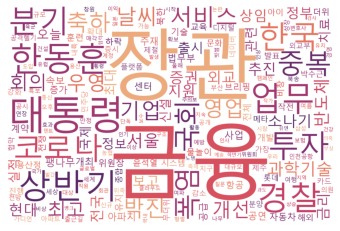

In [358]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color = 'white',
                     colormap = 'flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')
